# A comparison of 10K cohort thrombolysis rates vs SHAP values across hospitals

__NOTE__: Similar content is found in notebook 4. The difference here is that the hospital SHAP and thehospital 10k thrombolysis use come from different model fits.


## Plain English summary

Here we ask the question "Does the SHAP value for each hospital represent the propensity for which a clinician has for thrombolysis?"

To answer that question we compare each hospital's mean SHAP value (the average SHAP value for patients attending each hopsital) and the predicted 1use of thrombolysis in each hospital ehen each hospital sees the same 10k cohort of patients.

## Model and data

Use data already saved from previous notebooks.

* The expected thrombolysis rate of a 10K cohort across 132 hospitals, from an XGBoost model (using 8 features) fitted to the remaining data instances.

* The mean SHAP value for each hospital from an XGBoost model (using 8 features) fitted to the first k-fold split. Using one-hot encoding for the hospital feature. For just the instances for each hospital's own patients.

## Observations

* There is a strong relationship between the hospitals thrombolysis rate (for 10K patient cohort) and the hospitals SHAP value. An R-squared value of 0.861 suggests that the model relies mostly on the hospital SHAP value to adjust individual hospital thrombolysis predictions, but that those hospitals share the same general patterns of judging patient and pathway characteristics.

## Import libraries

In [1]:
# Turn warnings off to keep notebook tidy
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression

from scipy import stats

## Create output folders if needed

In [2]:
path = './output'
if not os.path.exists(path):
    os.makedirs(path)
    
path = './predictions'
if not os.path.exists(path):
    os.makedirs(path)

## Load data

In [3]:
# Read in thrombolysis rate on 10K cohort
thrombolysis_rate_10k = pd.read_csv(
    './output/10k_thrombolysis_rate_by_hosp_key_features.csv')
# Set index as stroke team
thrombolysis_rate_10k.set_index("stroke_team", inplace=True)

# Read in mean shap across all instances, for one-hot encoded hosptial features, 
# fitted using the first kfold model
hospital_mean_shap = pd.read_csv(
    './predictions/mean_shap_per_hospital_0fold.csv')
# Set index as stroke team
hospital_mean_shap.set_index("stroke_team", inplace=True)

In [4]:
# Join two dataframes using their index
hospital_data = hospital_mean_shap.join(thrombolysis_rate_10k, how="inner")
hospital_data

,shap_mean,Thrombolysis rate
stroke_team,,
AGNOF1041H,-0.016342,0.2956
AKCGO9726K,0.536124,0.3471
AOBTM3098N,-0.346190,0.2285
APXEE8191H,-0.030854,0.2778
ATDID5461S,0.337461,0.3052
...,...,...
YPKYH1768F,-0.232467,0.2574
YQMZV4284N,-0.004133,0.3035
ZBVSO0975W,-0.472060,0.2088


## Compare SHAP value for the hospital feature, and the predicted 10k thrombolysis rate

The hospital feature is one hot encoded, so there is a SHAP value per stroke team. We will use this to create two plots:

1) histogram of the frequency of the SHAP value for the hospital feature
2) scatter plot of SHAP value vs thrombolysis rate (on 10K cohort) for each hospital

Plot histogram of the frequency of the SHAP value for the hospital feature
(Note: repeating the same plot as in notebook 03)

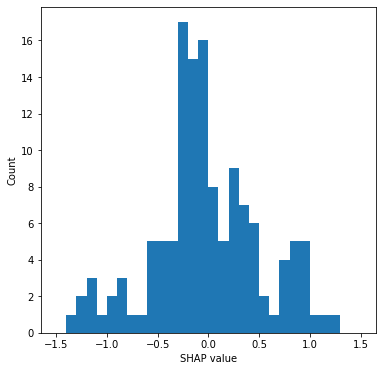

In [5]:
# Plot histogram
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
ax.hist(hospital_data["shap_mean"], bins=np.arange(-1.5, 1.51, 0.1))
ax.set_xlabel('SHAP value')
ax.set_ylabel('Count')
plt.savefig('./output/hosp_shap_hist.jpg', dpi=300,
    bbox_inches='tight', pad_inches=0.2)
plt.show()

Scatter plot of SHAP value vs thrombolysis rate (on 10K cohort) for each hospital

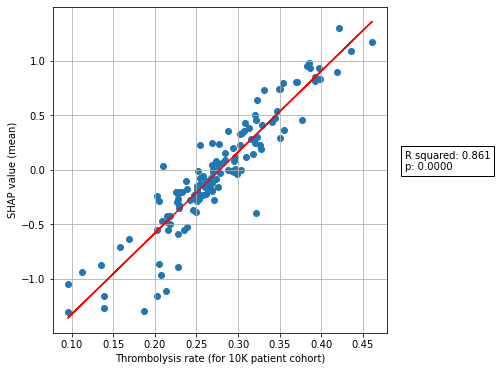

In [6]:
# Plot scatter plot
x = hospital_data['Thrombolysis rate']
y = hospital_data["shap_mean"]

# Fit a regression line to the points
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(x.values,y.values)
r_square = r_value ** 2
y_pred = intercept + (x * slope)

# Create scatter plot with regression line
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y)
plt.plot (x, y_pred, color = 'red')
text = f'R squared: {r_square:.3f}\np: {p_value:0.4f}'
ax1.text(0.5, 0, text, 
         bbox=dict(facecolor='white', edgecolor='black'))
ax1.set_xlabel('Thrombolysis rate (for 10K patient cohort)')
ax1.set_ylabel('SHAP value (mean)')
plt.grid()
plt.savefig('./output/scatter_plot_hosp_shap_vs_10k_thrombolysis.jpg', dpi=300,
    bbox_inches='tight', pad_inches=0.2)

plt.show()

## Observations

* There is a strong relationship between the hospitals thrombolysis rate (for 10K patient cohort) and the hospitals SHAP value. An R-squared value of 0.861 suggests that the model relies mostly on the hospital SHAP value to adjust individual hospital thrombolysis predictions, but that those hospitals share the same general patterns of juding patient and pathway characteristics.